# Dataset Information
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a negative sentiment associated with it. So, the task is to classify tweets from other tweets.

Formally, given a sample of tweets and sentiments, where sentiment '0' denotes the tweet is negative and sentiment '1' denotes the tweet is positive while '2' denotes the neutral tweet, our objective is to build the model with best accuracy.


 # Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_csv("C:/Users/vardh/Desktop/twitter_dataset.csv")
data.head()

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0.0
1,1,@Kenichan I dived many times for the ball. Man...,0.0
2,2,my whole body feels itchy and like its on fire,0.0
3,3,"@nationwideclass no, it's not behaving at all....",0.0
4,4,@Kwesidei not the whole crew,0.0


In [3]:
# datatype info
data.info()

#Finding Distribution of Data
data['sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142403 entries, 0 to 3142402
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   tweet       object 
 2   sentiment   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.9+ MB


0.0    1570067
1.0    1561529
2.0      10725
Name: sentiment, dtype: int64

In [4]:
#Dropping unnecessary column
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# Separating Dataset
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]
data_neu = data[data['sentiment'] == 2]

In [6]:
#Taking 15000 rows from each type so that we can run the code on our easily
data_pos = data_pos.iloc[:int(15000)]
data_neg = data_neg.iloc[:int(15000)]
data_neu = data_neu.iloc[:int(15000)]

In [7]:
#Combining Dataset
df = pd.concat([data_pos, data_neg,data_neu])
df['tweet']=df['tweet'].str.lower()
df.reset_index(drop=True, inplace= True)

# Preprocessing the dataset

In [8]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
# Remove Usernames
def rem_username(text):
    pattern=re.compile("@[\w]*")
    return pattern.sub('',text)
df['clean_tweet']=df['tweet'].apply(rem_username)

In [10]:
df.head()

,tweet,sentiment,clean_tweet
0,i love @health4uandpets u guys r the best!!,1.0,i love u guys r the best!!
1,im meeting up with one of my besties tonight! ...,1.0,im meeting up with one of my besties tonight! ...
2,"@darealsunisakim thanks for the twitter add, s...",1.0,"thanks for the twitter add, sunisa! i got to ..."
3,being sick can be really cheap when it hurts t...,1.0,being sick can be really cheap when it hurts t...
4,@lovesbrooklyn2 he has that effect on everyone,1.0,he has that effect on everyone


In [11]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,tweet,sentiment,clean_tweet
0,i love @health4uandpets u guys r the best!!,1.0,i love u guys r the best
1,im meeting up with one of my besties tonight! ...,1.0,im meeting up with one of my besties tonight ...
2,"@darealsunisakim thanks for the twitter add, s...",1.0,thanks for the twitter add sunisa i got to ...
3,being sick can be really cheap when it hurts t...,1.0,being sick can be really cheap when it hurts t...
4,@lovesbrooklyn2 he has that effect on everyone,1.0,he has that effect on everyone


In [12]:
#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
df.head()

,tweet,sentiment,clean_tweet
0,i love @health4uandpets u guys r the best!!,1.0,love guys the best
1,im meeting up with one of my besties tonight! ...,1.0,meeting with one besties tonight cant wait gir...
2,"@darealsunisakim thanks for the twitter add, s...",1.0,thanks for the twitter add sunisa got meet you...
3,being sick can be really cheap when it hurts t...,1.0,being sick can really cheap when hurts too muc...
4,@lovesbrooklyn2 he has that effect on everyone,1.0,has that effect everyone


# Tokenization

In [13]:
# from nltk.tokenize import word_tokenize
# # nltk.download('punkt')
# tokenized_tweet = df['clean_tweet'].apply(lambda text:word_tokenize(text))

In [14]:
#individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                              [love, guys, the, best]
1    [meeting, with, one, besties, tonight, cant, w...
2    [thanks, for, the, twitter, add, sunisa, got, ...
3    [being, sick, can, really, cheap, when, hurts,...
4                        [has, that, effect, everyone]
Name: clean_tweet, dtype: object

# Stemming 

In [15]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# data['clean_tweet'] = data['clean_tweet'].apply(lambda text: cleaning_stopwords(text) for i in text)
# data['clean_tweet'].head()

In [16]:
# stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word.lower()) for word in sentence if word not in STOPWORDS])
tokenized_tweet.head()

0                                    [love, guy, best]
1    [meet, one, besti, tonight, cant, wait, girl, ...
2    [thank, twitter, add, sunisa, got, meet, hin, ...
3    [sick, realli, cheap, hurt, much, eat, real, f...
4                                    [effect, everyon]
Name: clean_tweet, dtype: object

In [17]:
# combine words into single sentence
#df.reset_index(drop=True,inplace=True)
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,tweet,sentiment,clean_tweet
0,i love @health4uandpets u guys r the best!!,1.0,love guy best
1,im meeting up with one of my besties tonight! ...,1.0,meet one besti tonight cant wait girl talk
2,"@darealsunisakim thanks for the twitter add, s...",1.0,thank twitter add sunisa got meet hin show are...
3,being sick can be really cheap when it hurts t...,1.0,sick realli cheap hurt much eat real food plu ...
4,@lovesbrooklyn2 he has that effect on everyone,1.0,effect everyon


# Visualizing Frequent words

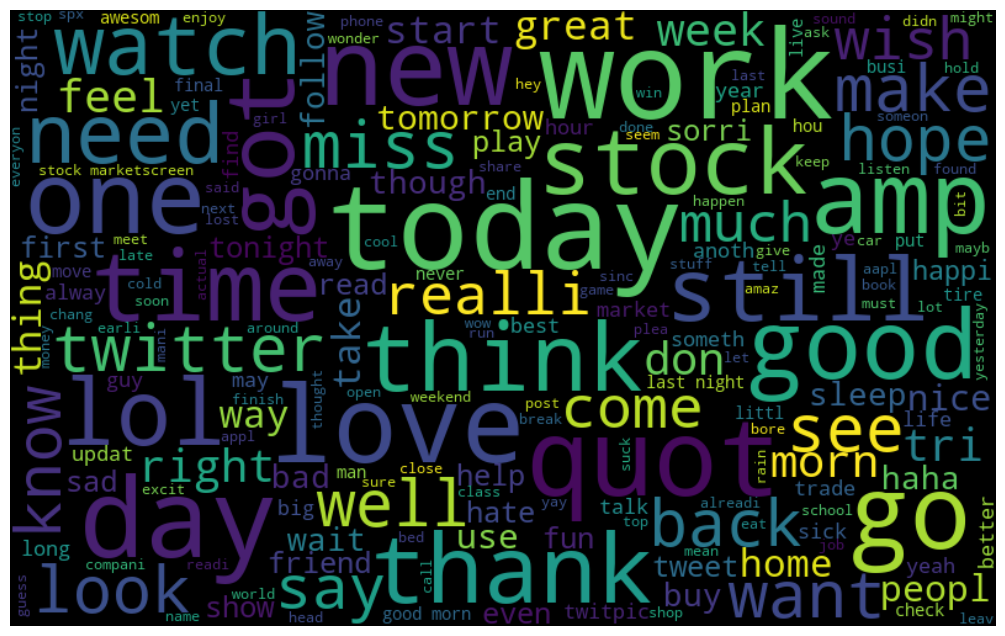

In [18]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


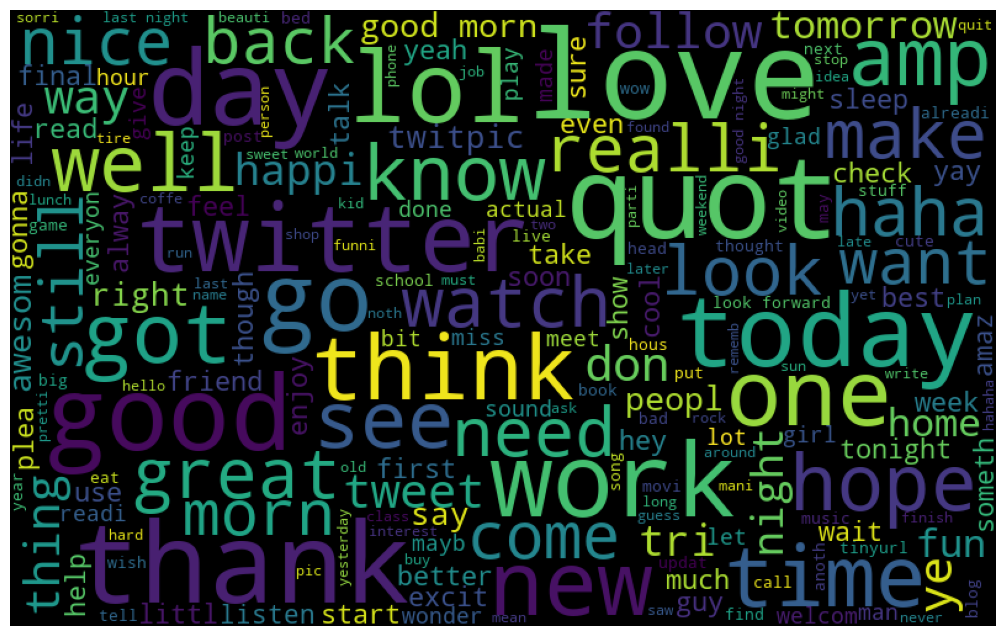

In [19]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

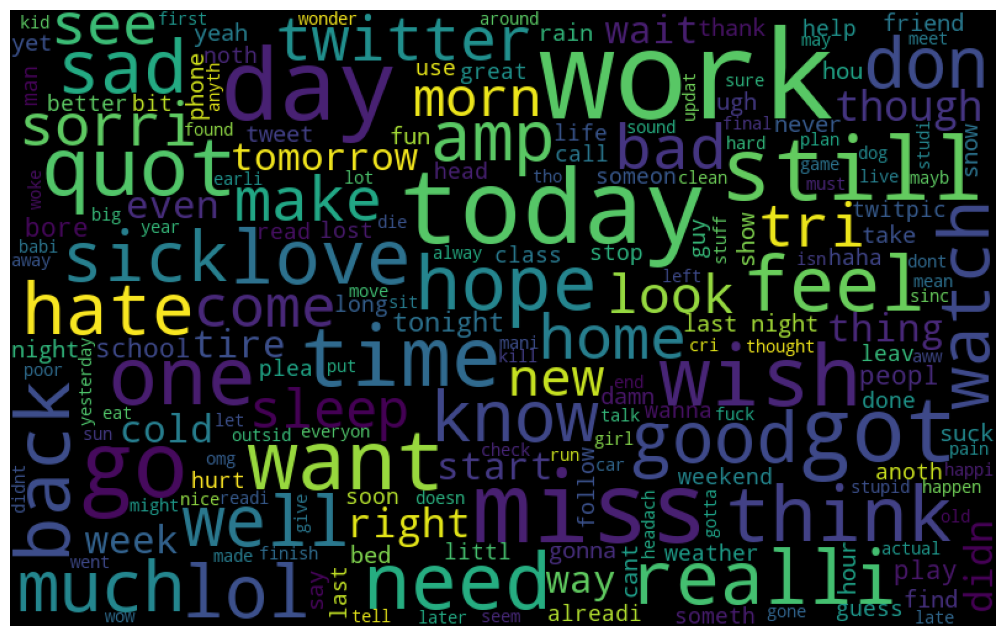

In [20]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Hashtags

In [21]:
#Taking Whole dataset for Hashtag 
#Preprocessing
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")
data['tweet'] = data['tweet'].apply(lambda x: " ".join([w.lower() for w in x.split() if len(w)>2]))

In [22]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [23]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(data['tweet'][data['sentiment']==1])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(data['tweet'][data['sentiment']==0])

In [24]:
ht_pos=[]
for rows in ht_positive:
    for i in rows:
        ht_pos.append(i)
ht_pos[:5]

['devunity', 'alexa', 'japan', 'skype', 'expletives']

In [25]:
ht_neg=[]
for rows in ht_negative:
    for i in rows:
        ht_neg.append(i)
ht_neg[:5]

['itm', 'therapyfail', 'fb', 'ttsc', 'gayforpeavy']

In [26]:
freq = nltk.FreqDist(ht_pos)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head(10)

,Hashtag,Count
0,devunity,1
1,alexa,1
2,japan,5
3,skype,3
4,expletives,1
5,musicmonday,383
6,chuck,67
7,nightcard,1
8,paragon,1
9,dogs,2


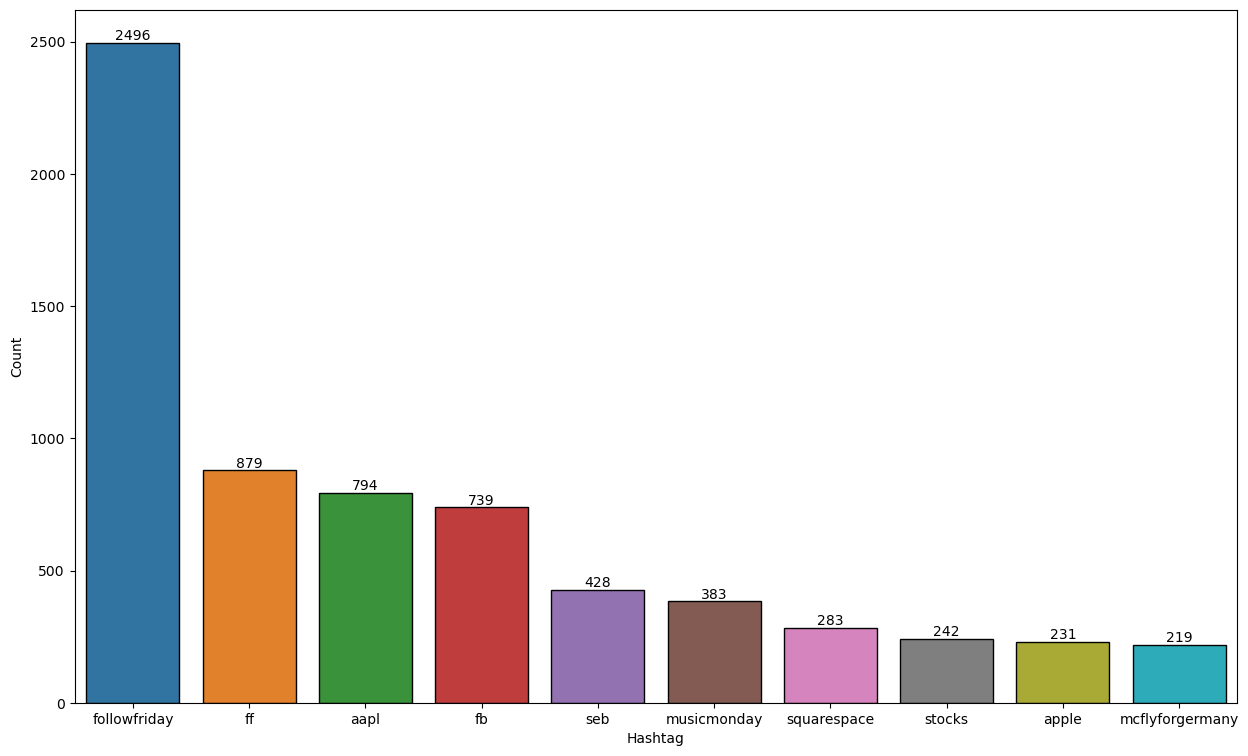

In [27]:
# select top 10 positive hashtags
dp = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=dp, x='Hashtag', y='Count',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
freqn = nltk.FreqDist(ht_neg)
dn= pd.DataFrame({'Hashtag': list(freqn.keys()),
                 'Count': list(freqn.values())})
dn.head(10)

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,fb,1062
3,ttsc,1
4,gayforpeavy,1
5,fml,24
6,camerafail,1
7,travian,1
8,wow,29
9,art,2


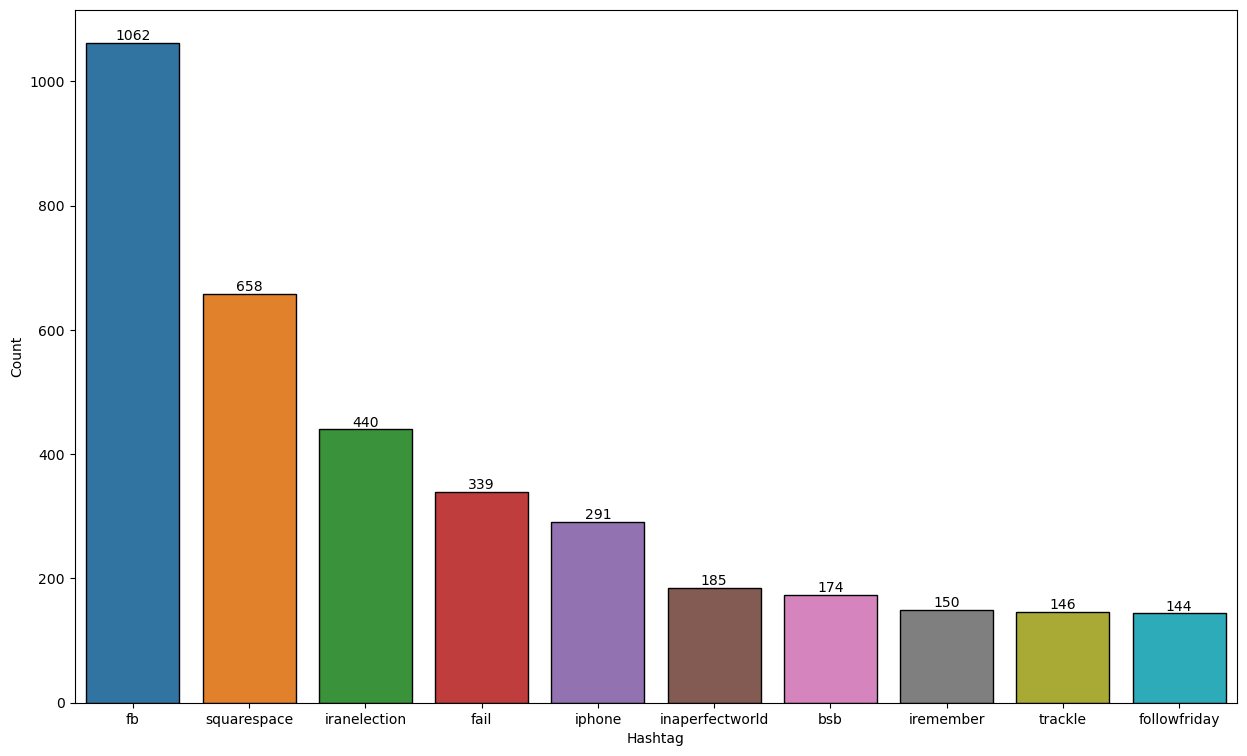

In [29]:
# select top 10 negative hashtags
dn = dn.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=dn, x='Hashtag', y='Count',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars)

# Creating the Bag of Words model

In [30]:
# feature extraction max_df=0.90, min_df=2, 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')
x= cv.fit_transform(df['clean_tweet']).toarray()
y=df['sentiment'].values
y

array([1., 1., 1., ..., 2., 2., 2.])

# Splitting the dataset into the Training set and Test set


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

# Training the LogisticRegression model on the Training set

In [32]:
from sklearn.linear_model import LogisticRegression
model_1= LogisticRegression()
model_1.fit(x_train, y_train)

LogisticRegression()

Predicting Output and checking the model performance

In [33]:
# testing
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
pred = model_1.predict(x_test)

In [34]:
cm1 = confusion_matrix(y_test, pred)
print(cm1)
print(classification_report(y_test,pred))
print()
print("accuracy_score : ",accuracy_score(y_test,pred))

[[2502 1112   57]
 [ 874 2834   71]
 [  93  194 2445]]
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      3671
         1.0       0.68      0.75      0.72      3779
         2.0       0.95      0.89      0.92      2732

    accuracy                           0.76     10182
   macro avg       0.79      0.78      0.78     10182
weighted avg       0.77      0.76      0.77     10182


accuracy_score :  0.7641917108623061


# Training the Naive Bayes model on the Training set

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Predicting Output and checking the model performance

In [36]:
y1_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1_pred)
print(cm)
print()
print(classification_report(y_test,y1_pred))

[[1679 1869  123]
 [ 589 3028  162]
 [  66  320 2346]]

              precision    recall  f1-score   support

         0.0       0.72      0.46      0.56      3671
         1.0       0.58      0.80      0.67      3779
         2.0       0.89      0.86      0.87      2732

    accuracy                           0.69     10182
   macro avg       0.73      0.71      0.70     10182
weighted avg       0.71      0.69      0.69     10182



# Training the RandomForestClassifier model on the Training set

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFC.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting Output and checking the model performance

In [38]:
y2_pred = RFC.predict(x_test)
cm1 = confusion_matrix(y_test, y2_pred)
print(cm1)
print()
print(classification_report(y_test,y2_pred))

[[2386 1157  128]
 [1070 2567  142]
 [ 118  178 2436]]

              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66      3671
         1.0       0.66      0.68      0.67      3779
         2.0       0.90      0.89      0.90      2732

    accuracy                           0.73     10182
   macro avg       0.74      0.74      0.74     10182
weighted avg       0.73      0.73      0.73     10182



# Training the SupportVectorClassifier model on the Training set

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(x_train, y_train)

SVC(random_state=0)

Predicting Output and checking the model performance

In [40]:
y3_pred = svc.predict(x_test)
cm2 = confusion_matrix(y_test, y3_pred)
print(cm2)
print()
print(classification_report(y_test,y3_pred))

[[2489 1138   44]
 [ 807 2908   64]
 [  84  221 2427]]

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      3671
         1.0       0.68      0.77      0.72      3779
         2.0       0.96      0.89      0.92      2732

    accuracy                           0.77     10182
   macro avg       0.79      0.78      0.78     10182
weighted avg       0.78      0.77      0.77     10182



In [41]:
print(accuracy_score(y_test,y3_pred))

0.7684148497348262


# Conclusion

Top Three Models:
Upon evaluating all the models we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is SVM performs better than  Logistic Regression which in turn performs better than RandomForestClassifier.

F1-score: The F1 Scores for class 0 ,class 1 and class 2 are : 
(a) For class 0: RandomForestClassifier(F1_score = 0.66)  < Logistic Regression (F1_score = 0.70) < SVM (F1_score =0.71) 
(b) For class 1: RandomForestClassifier (F1_score = 0.67) < SVM (F1_score = 0.72) = Logistic Regression (F1_score = 0.72)
(c) For class 2: RandomForestClassifier (F1_score = 0.90) < SVM (F1_score = 0.92) = Logistic Regression (F1_score = 0.92)

We, therefore, conclude that the Support Vector Machine is the best model for the above-given dataset.
Since our dataset does not have any assumptions and Logistic Regression is a simple model, therefore the concept holds true for the above-mentioned dataset i.e. the simple model will have a better performance.